<a href="https://colab.research.google.com/github/RudraLM10/Sleep-Disorders/blob/main/Sleep_Disorder_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sleep Health & Lifestyle Analysis**

Sleep is a vital and indispensable aspect of our lives. Without adequate sleep, we risk facing significant challenges to our well-being. Insufficient rest or neglecting self-care can negatively impact our mental health and overall physical condition, potentially leading to issues such as insomnia or sleep apnea.

This study aims to identify the various factors that influence sleep quality and patterns. Additionally, we seek to determine whether these factors can be leveraged to accurately diagnose sleep conditions. By understanding these relationships, healthcare providers can utilize the insights gained from this research to develop personalized treatment plans tailored to an individual's specific sleep issues. Such targeted interventions can not only address existing sleep disorders but also promote better overall health and improve quality of life.

**Objective** - Identify potential sleep disorders and factors that influence sleep quality and patterns.

**Solution** - Utilize visualization techniques to explore factors affecting sleep quality and develop a classification model to predict potential sleep disorders.

## 1) Importing Libraries

The dataset that we will be using was taken from [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset).


The libraries we will use for this project include:

*   NumPy: For numerical computations and handling multi-dimensional arrays.
*   Pandas: For data manipulation and analysis in tabular formats.
*   Matplotlib and Seaborn: For creating informative and visually appealing plots.
*   Scikit-Learn: For building and evaluating machine learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,roc_curve, auc
from imblearn.over_sampling import SMOTE

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
file_path = os.path.join(path, 'Sleep_health_and_lifestyle_dataset.csv')

100%|██████████| 2.54k/2.54k [00:00<00:00, 4.43MB/s]

Extracting files...


## 2) Understanding Our Data
 The data contains the following columns:

* Person ID: Unique identifier for each individual.
* Gender: Indicates whether the individual is male or female.
* Age: The age of the individual.
* Occupation: The career or profession of the individual.
Sleep Duration: The average number of hours the person sleeps per day.
* Quality of Sleep: A subjective self-reported rating of sleep quality on a scale of 1-10.
* Physical Activity Level: The average daily duration (in minutes) of physical activity.
* Stress Level: A subjective self-reported stress level on a scale of 1-10.
* BMI Category: Classification of the individual’s weight as Normal, Overweight, or Obese.
* Blood Pressure: Recorded as systolic pressure over diastolic pressure (e.g., 120/80).
Heart Rate: Measured in beats per minute (BPM).
* Daily Steps: The number of steps taken by the individual each day.
* Sleep Disorder: Indicates the presence of a sleep disorder, categorized as None, Insomnia, or Sleep Apnea.

We will start by understanding our dataset, which involves loading the data, examining its structure, identifying data types and missing values, correcting any formatting issues, and adding additional features if necessary.

In [4]:
df = pd.read_csv(file_path)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
print("\nUnique values for each feature:")
# Iterate through each column to display unique values
for column in df.columns:
    if df[column].dtype == 'object':
     print(f'-------------------------------------------------------')
     print(f"{column}: {df[column].unique()}")


Unique values for each feature:
-------------------------------------------------------
Gender: ['Male' 'Female']
-------------------------------------------------------
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
-------------------------------------------------------
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
-------------------------------------------------------
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
-------------------------------------------------------
Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']


The dataset contains 374 entries and 13 columns. Each entry represents a fictive individual's health and sleep-related metrics. The data types are consistent with the data description provided.
We observed that the Person ID feature is not useful for our analysis as it merely represents a sequential numbering starting from 1. Additionally, our target variable, Sleep Disorder, contains a significant number of missing values, accounting for more than half of the data.

In [8]:
df.drop('Person ID', axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
df.nunique()

,0
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25
Heart Rate,19


In [10]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [11]:
df['Sleep Disorder'].fillna('None', inplace=True)
df['Sleep Disorder'].head()

,Sleep Disorder
0,None
1,None
2,None
3,Sleep Apnea
4,Sleep Apnea


In [12]:
df['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [14]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3) Exploratory Data Anaysis

In this section, we will focus on exploring the data by examining its features, visualizing distributions, and uncovering relationships between variables. This will help us identify key patterns and insights that will inform the development of our classification model. Through various visualization techniques, we aim to gain a deeper understanding of the dataset, identify influential factors, and uncover trends that will guide our approach to modeling.

To begin, we will use the **describe** function to obtain key statistics for our numeric features, including the mean, median, standard deviation, quartiles, minimum, maximum, and count. Additionally, we will analyze the categorical data to gather further insights into its distribution and characteristics, helping us better understand the structure and behavior of the dataset.


In [15]:
round(df.describe(exclude = 'object'), 2).style.background_gradient(cmap='BuPu')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.180000,7.130000,7.310000,59.170000,5.390000,70.170000,6816.840000
std,8.670000,0.800000,1.200000,20.830000,1.770000,4.140000,1617.920000
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [16]:
round(df.describe(exclude = ['float', 'int64']),2).style.set_properties(
    **{'background-color': '#4A235A','color': '#E2EEF3'}
    )

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,3,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,216,99,219


### 3.1) Statistical Analysis
The descriptive statistics reveal the following insights:

- The average age of individuals in the dataset is approximately 42 years, with a range from 27 to 59 years.
- On average, individuals sleep for around 7.13 hours per night, with a minimum of 5.8 hours and a maximum of 8.5 hours.
- The average sleep quality rating is 7.31 on a scale of 1 to 10.
- Individuals engage in physical activity for an average of 59 minutes per day.
- The average stress level is approximately 5.39 on a scale of 1 to 10.
- The average heart rate is about 70 beats per minute.
- The average number of daily steps is around 6,817.
- The dataset exhibits a balanced distribution between male and female participants.
- The most common occupation in the dataset is "Nurse."
- The BMI category feature shows potential imbalance, as more than half of the data falls into a single category.
- The target variable, **Sleep Disorder**, also appears to be imbalanced.

Regarding categorical data, there is redundancy in the **BMI Category** feature with both 'Normal' and 'Normal Weight' labels, which may require cleaning. Additionally, the **Blood Pressure** variable is currently formatted as a composite string (e.g., '120/80'), combining systolic and diastolic readings. For machine learning models, it is more effective to separate these values into individual features, as systolic and diastolic readings can provide different health insights, allowing models to leverage this information more effectively.

In [17]:
df['Systolic'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
df['Diastolic'] = df['Blood Pressure'].str.split('/').str[1].astype(int)

df.drop('Blood Pressure', axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


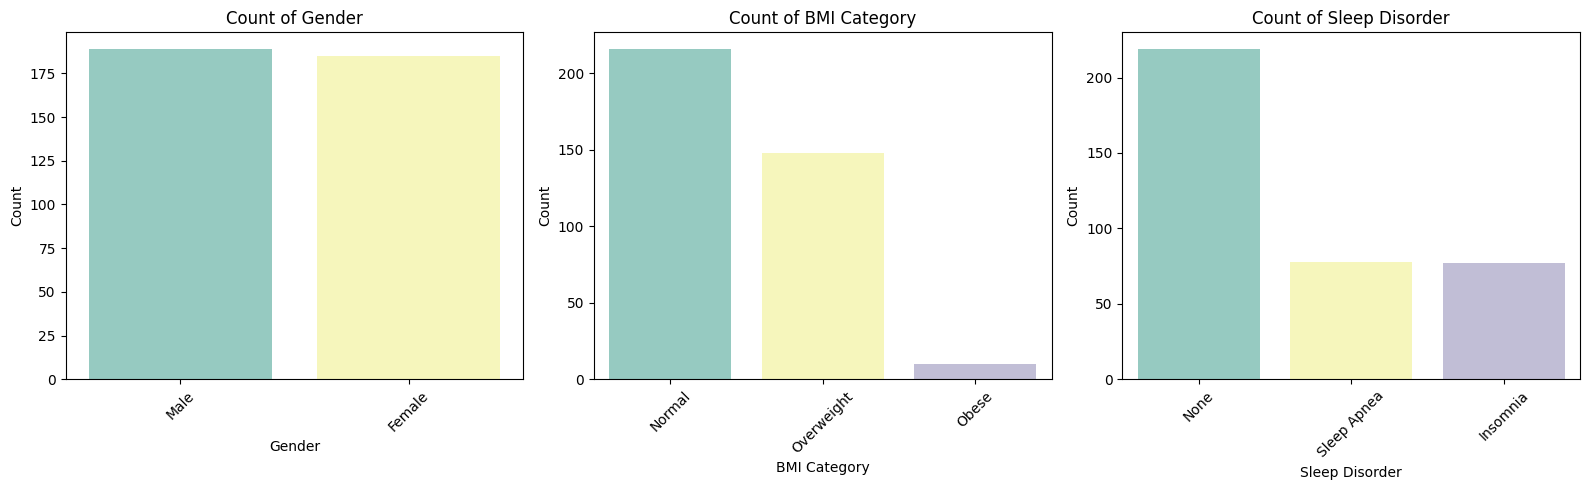

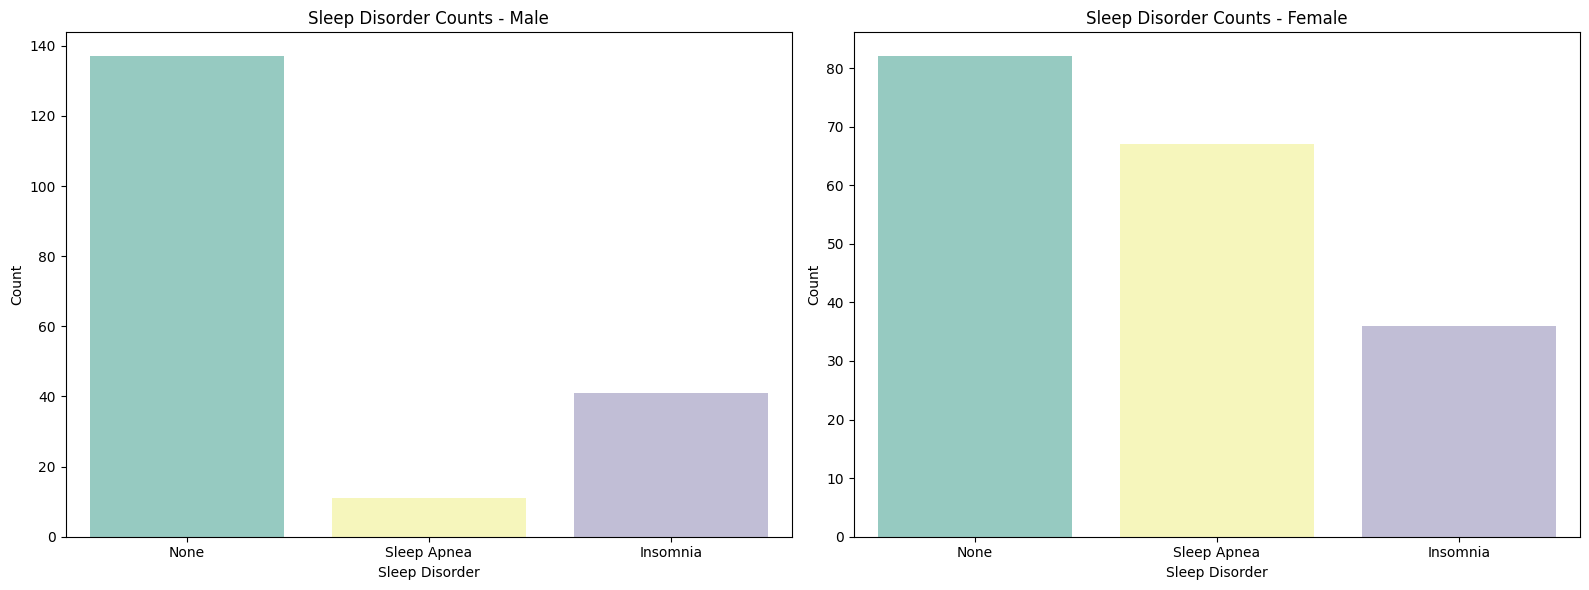

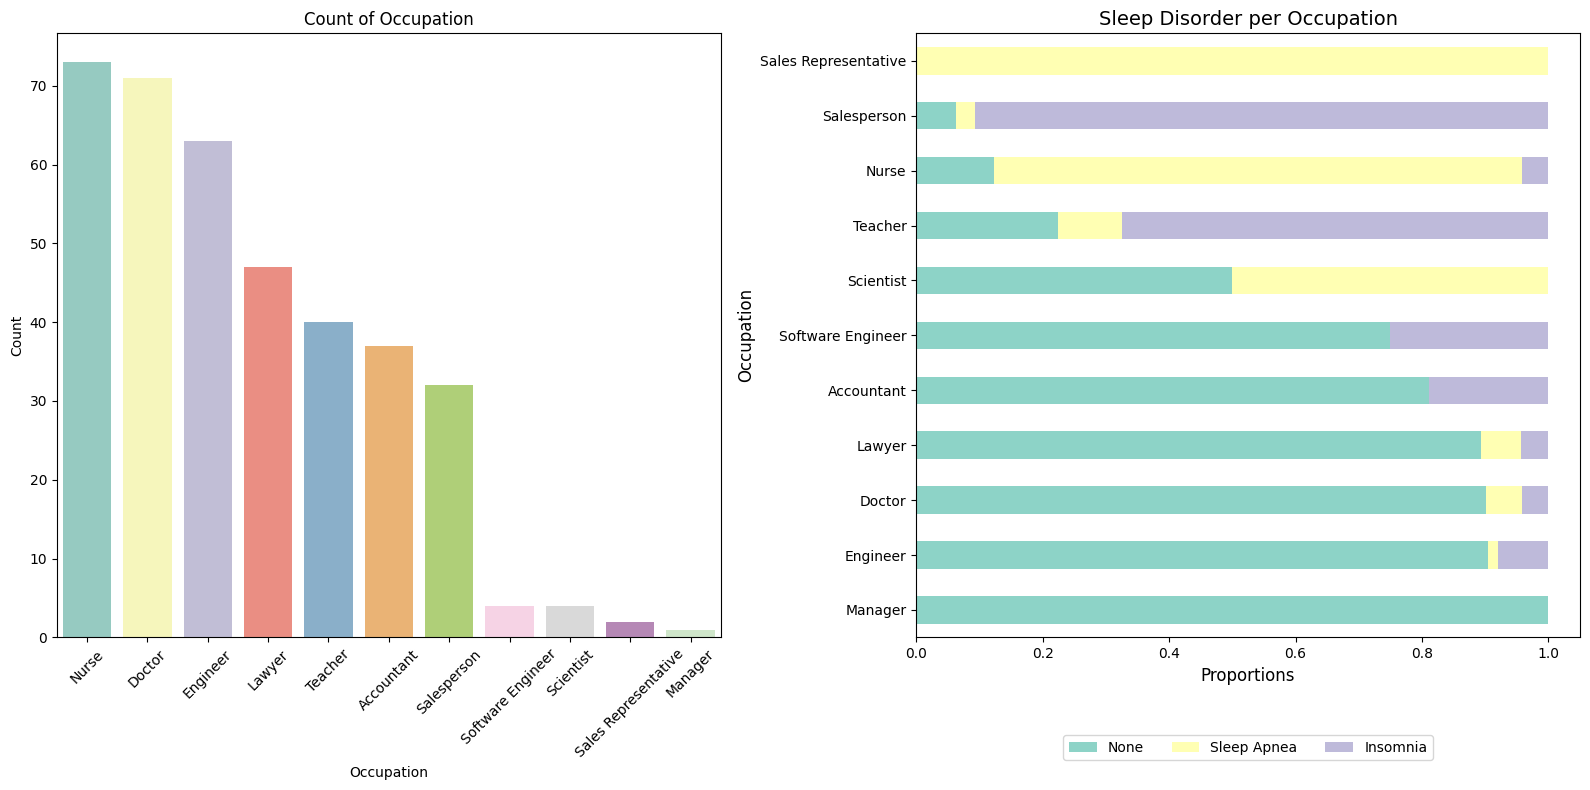

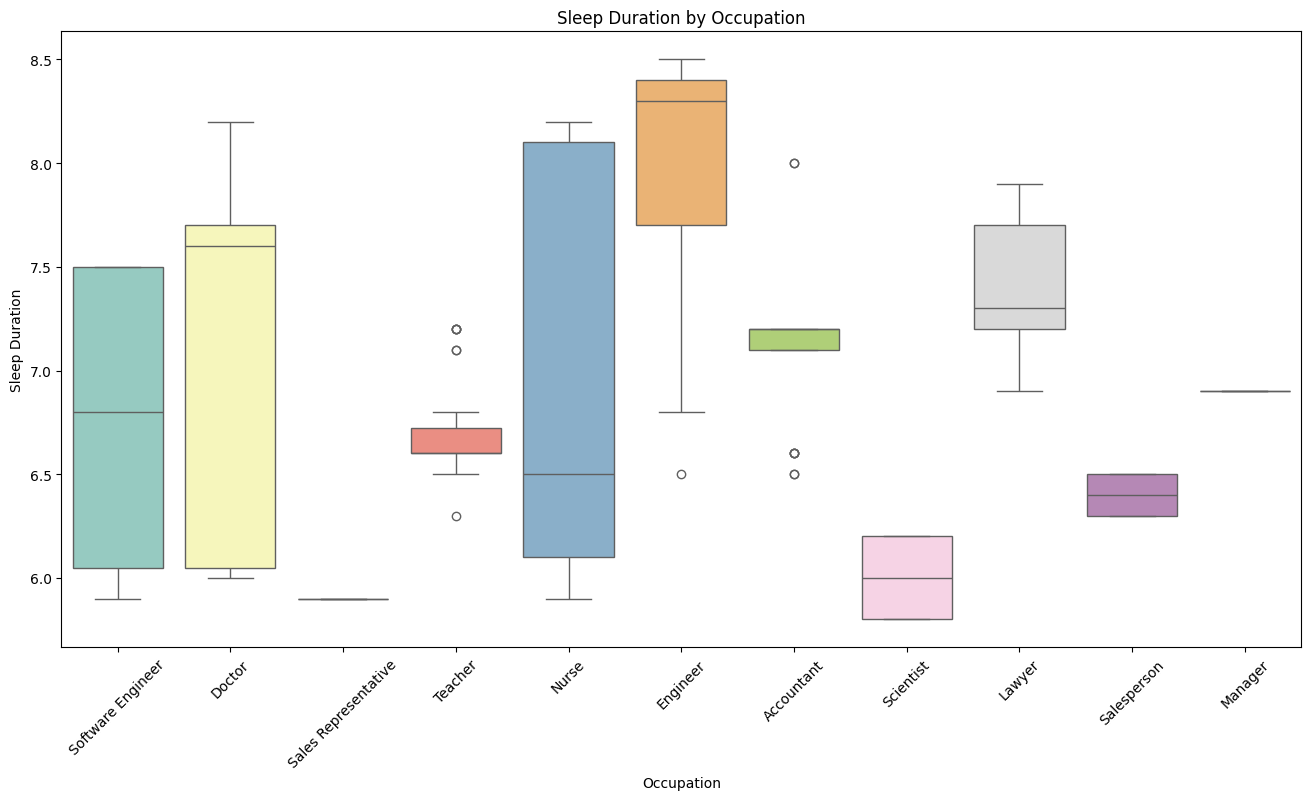

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
sns.set_palette('Set3')

# Distribution of Categorical Variables
features = ['Gender', 'BMI Category', 'Sleep Disorder']
order_sleep_disorder = ['None', 'Sleep Apnea', 'Insomnia']

for i, feature in enumerate(features):
    order = df[feature].value_counts().index

    sns.countplot(x=feature, data=df, ax=axes[i], palette='Set3', order=order)

    axes[i].set_title(f'Count of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Distribution of Sleep Disorder vs Gender
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Plot for Male
sns.countplot(x='Sleep Disorder', data=male_data, ax=axes[0], palette='Set3', order=order_sleep_disorder)
axes[0].set_title('Sleep Disorder Counts - Male')
axes[0].set_xlabel('Sleep Disorder')
axes[0].set_ylabel('Count')

# Plot for Female
sns.countplot(x='Sleep Disorder', data=female_data, ax=axes[1], palette='Set3', order=order_sleep_disorder)
axes[1].set_title('Sleep Disorder Counts - Female')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Distribution of Occupation vs Sleep Disorder
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

order = df['Occupation'].value_counts().index
sns.countplot(x='Occupation', data=df, ax=axes[0], palette='Set3', order=order)
axes[0].set_title('Count of Occupation')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

occup_dis = df.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack().sort_values(by='None', ascending=False)

occup_dis[order_sleep_disorder].plot(kind='barh',stacked=True, ax=axes[1])
axes[1].set_title('Sleep Disorder per Occupation', fontsize=14)
axes[1].set_xlabel('Proportions', fontsize=12)
axes[1].set_ylabel('Occupation', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()

# Boxplot for Sleep Disorder vs Occupation
plt.figure(figsize=(16,8))

sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='Set3')
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)
plt.show()

### 3.2) Categorical Analysis
In the countplots, we observe a higher number of instances in the 'None' category under **Sleep Disorder**, indicating an imbalanced distribution in the target variable for our classification task. We will address this imbalance later using the SMOTE technique. The distribution of **Gender** appears to be relatively balanced, while **Occupation** shows a more varied spread. Additionally, the **BMI Category** is also imbalanced, with a disproportionate number of individuals falling into a single category.

Key Insights:

- **Dominance of 'None' Category in Sleep Disorders**: In most occupations, the majority of individuals do not report sleep disorders, as evidenced by the predominance of the 'None' category in the data.
  
- **Nurses at Risk**: A notable portion of nurses appear to suffer from 'Sleep Apnea' compared to other professions, suggesting that specific occupational stressors or lifestyle factors may contribute to this disorder.

- **Insomnia in Teachers and Salespersons**: 'Insomnia' is higher among teachers and salespersons when compared to other occupations, indicating potential job-related factors influencing their sleep quality.

- **Sleep Apnea in Females**: Females appear to have a higher prevalence of sleep apnea compared to males. This suggests that gender may play a role in the susceptibility to this sleep disorder.

- **Occupational Rarity and Sleep Disorder**: Despite being one of the least represented occupations in the dataset, 'Sales Representatives' exhibit a disproportionately higher rate of sleep disorders, suggesting that the profession may have unique stressors contributing to this outcome.

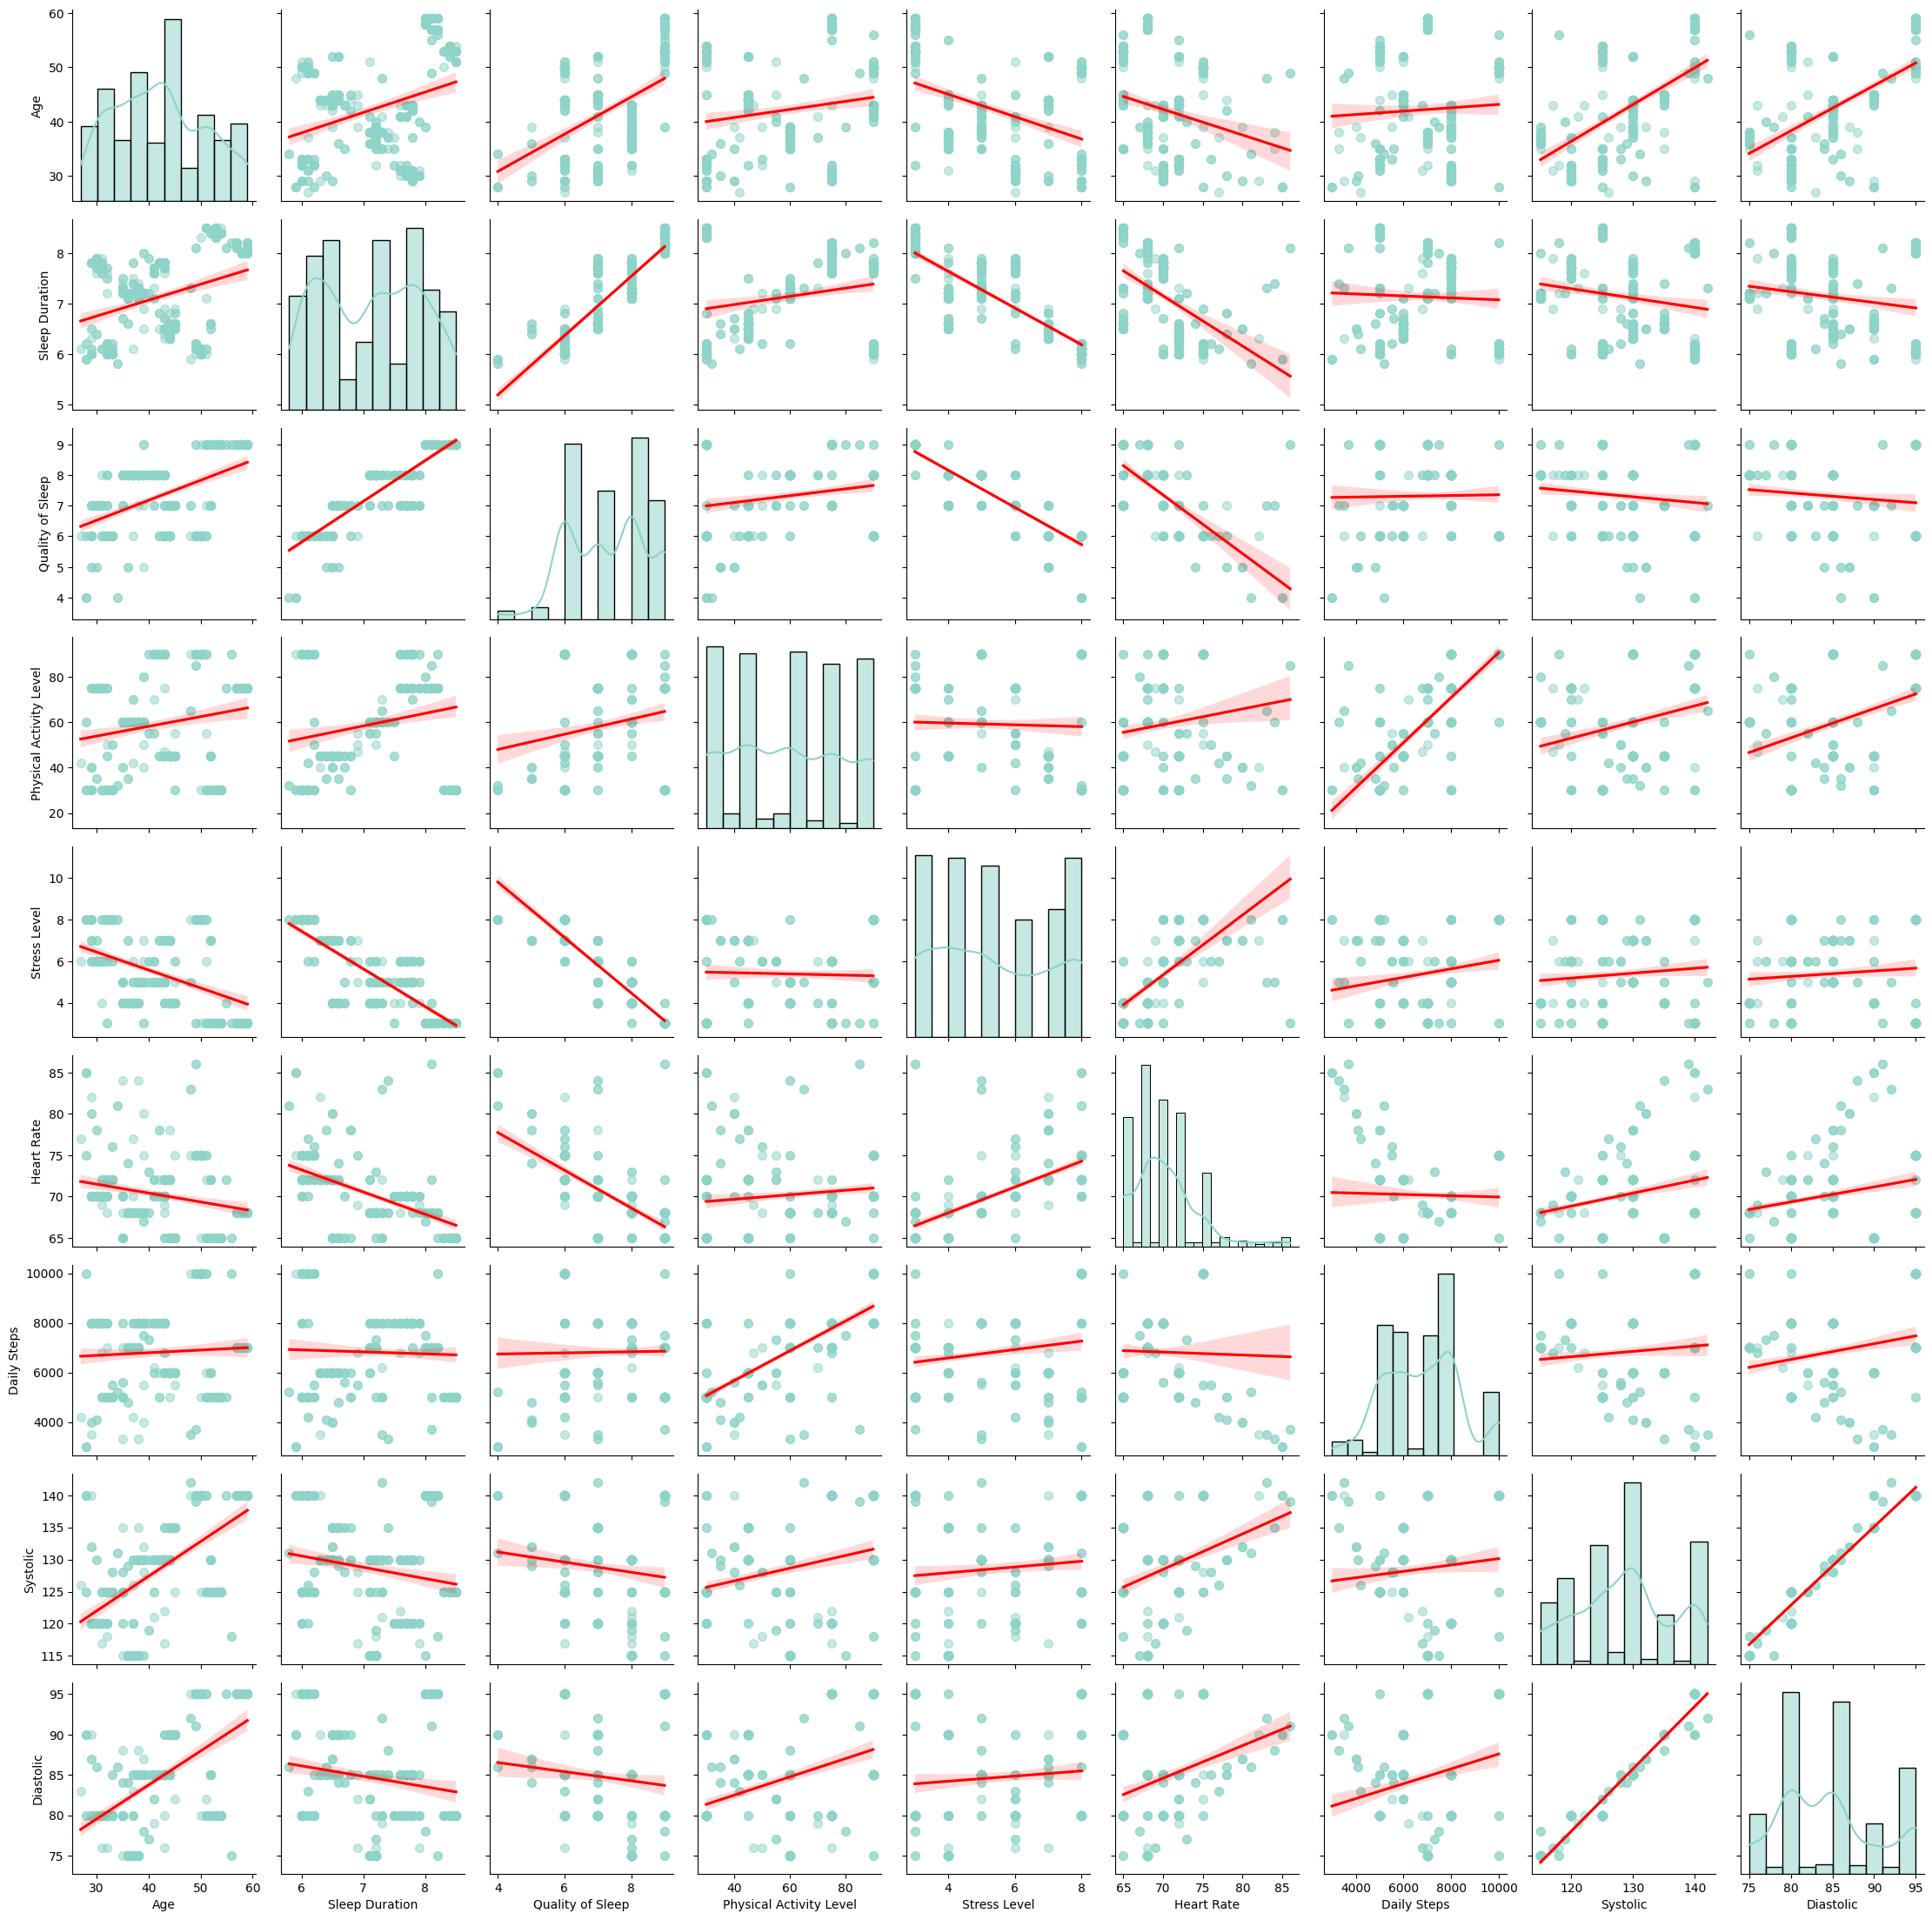

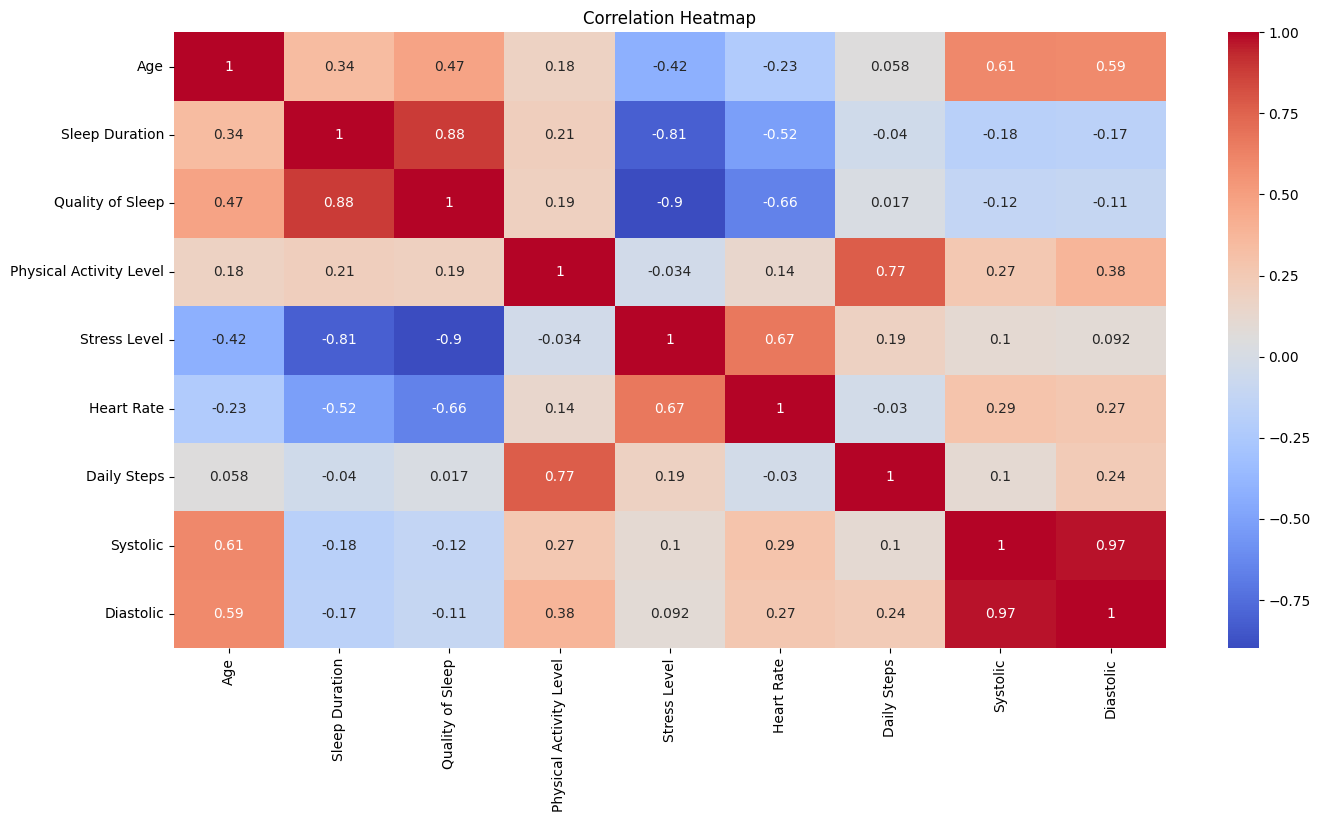

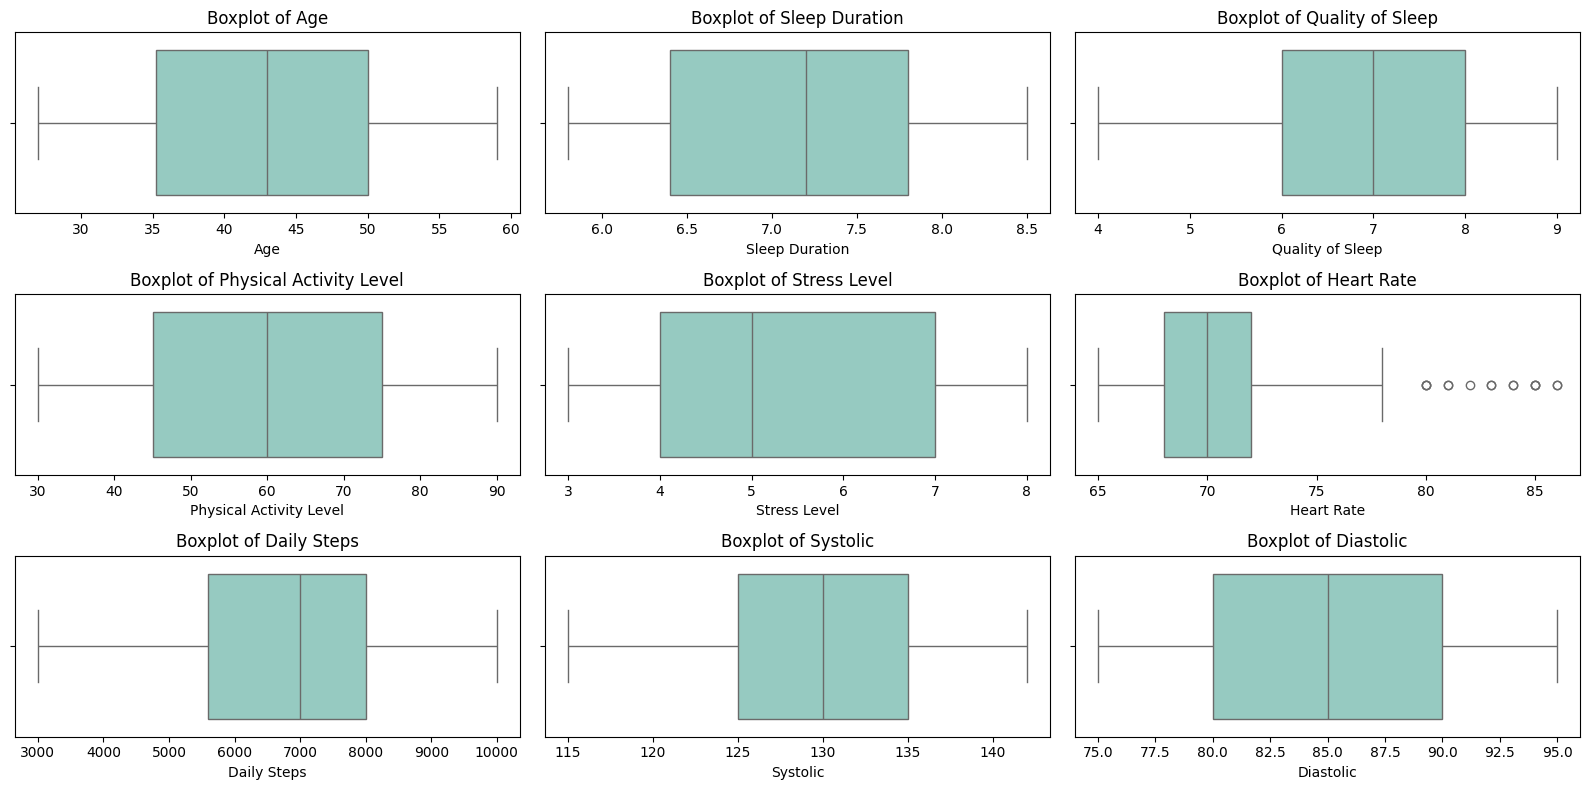

In [19]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']

# Histogram with Kde along diagonals.
# Regression Plots along off diagnoals.
pair_grid = sns.PairGrid(data=df[numeric_features], diag_sharey=False)
pair_grid.map_diag(sns.histplot, kde=True)
pair_grid.map_offdiag(sns.regplot, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})

# Correlation Heatmap
corr = df[numeric_features].corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots to identify Outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,8))

for i, feature in enumerate(numeric_features):
  row = i // 3
  col = i % 3
  sns.boxplot(x=feature, data=df, ax=axes[row, col], palette='Set3')
  axes[row, col].set_title(f'Boxplot of {feature}')
  axes[row, col].set_xlabel(feature)

plt.tight_layout()
plt.show()

### 3.3) Numerical Analysis

The histograms indicate that:
- The **Age** distribution is slightly right-skewed, indicating more younger individuals than older ones.
- The **Quality of Sleep** is left-skewed, suggesting that most individuals report better sleep quality.
- The **Heart Rate** distribution is relatively normal but leans towards the lower end, indicating more individuals with lower heart rates.
- The other **numerical variables** show no clear patterns, with about half of them having a balanced distribution across the dataset.

The scatterplots, along with the correlation heatmap, reveal that:

- **Sleep Duration & Quality of Sleep**: A strong positive linear relationship exists between Sleep Duration and Quality of Sleep, with a correlation of 0.88. This indicates that as sleep duration increases, the quality of sleep improves.
- **Sleep Duration & Stress Level**: Sleep Duration shows a negative linear relationship with Stress Level (-0.81), implying that individuals with higher stress levels tend to have shorter sleep durations.
- **Sleep Duration & Heart Rate**: Sleep Duration is negatively correlated with Heart Rate (-0.52), suggesting that individuals with lower heart rates tend to sleep longer, though this relationship might be influenced by outliers.
- **Quality of Sleep & Stress Level**: There is a strong negative linear relationship between Quality of Sleep and Stress Level (-0.90), meaning individuals with higher stress levels tend to report lower quality of sleep.
- **Quality of Sleep & Heart Rate**: Quality of Sleep also shows a negative correlation with Heart Rate (-0.66), indicating that individuals with higher heart rates tend to report poorer sleep quality.
- **Stress Level & Heart Rate**: Stress Level has a moderate positive linear relationship with Heart Rate (0.67), suggesting that higher stress levels are linked to higher heart rates.
- **Age & Quality of Sleep**: A positive linear trend is observed between Age and Quality of Sleep (correlation 0.47), indicating that older individuals tend to report better quality sleep.
- **Age & Blood Pressure**: Age shows a positive linear correlation with both Systolic (0.61) and Diastolic (0.59) blood pressure readings, suggesting that blood pressure tends to rise with age.
- **Systolic & Diastolic Blood Pressure**: Systolic and Diastolic blood pressure are strongly correlated (0.91), indicating a high degree of linearity between these two measures.

The boxplots reveal that:
- The box plots reveal outliers in Heart Rate, but these "outliers" appear to be natural extremes rather than errors. Heart rate values, even at the extreme ends of the distribution, fall within typical physiological ranges for individuals.

## 4) Model Implementation

### 4.1) Data Preprocessing & Model Selection
With the data analysis and exploration complete, we will now proceed to preprocess the data and build our model.

*   To address the imbalance in the data, we will use SMOTE (Synthetic Minority Oversampling Technique), a method that generates synthetic samples for the minority class by interpolating between existing samples, thereby balancing the dataset and improving model performance.
*   As a baseline model, we will use **Logistic Regression** without L2 regularization, and then experiment with L2 regularization (Ridge) to address multicollinearity by constraining coefficient magnitudes.
*   **SVM** will also be trained as it is effective with multicollinear features and works well with kernel methods.  
*   A **Random Forest Classifier** will be evaluated for its ability to handle multicollinearity by considering random feature subsets in each tree. Additionally, it provides feature importance insights.  
*   We will assess **K-Nearest Neighbors (KNN)**, ensuring proper scaling, as it captures complex feature relationships despite being sensitive to multicollinearity.
*   Lastly, **XGBoost** will be used for its robustness to collinearity, built-in regularization, and effective handling of imbalanced data.  

We will apply **Label Encoding** to the categorical feature to convert it into numerical values, making it compatible with machine learning algorithms. Additionally, we will use **Standardization** with **StandardScaler** to scale the features, ensuring that they have a mean of 0 and a standard deviation of 1, which improves the performance and convergence speed of models that rely on distance metrics or gradient descent.This approach ensures a comprehensive evaluation of models for predicting sleep disorders.

In [20]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['BMI Category'] = le.fit_transform(X['BMI Category'])
X['Occupation'] = le.fit_transform(X['Occupation'])
y = le.fit_transform(y)

X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,2,77,4200,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,140,90


In [21]:
y[:5]

array([1, 1, 1, 2, 2])

In [22]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled.shape

(657, 12)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

### 4.2) Model Training & Evaluation

We will train the model on the training data using cross-validation. This approach helps estimate the model's performance by evaluating it on multiple splits of the training data, providing a more robust evaluation and reducing the risk of overfitting to any specific portion of the dataset.

Given the class imbalance in the dataset, accuracy may not adequately reflect the model's performance. Therefore, we will prioritize the F1-score, as it provides a balance between precision and recall, making it a more appropriate metric for imbalanced datasets.

During cross-validation, we will set the scoring parameter to 'f1_weighted' to ensure the F1-score is weighted by the support of each class. For a thorough evaluation, we will utilize sklearn's classification report to extract precision, recall, and F1-score for each class. Additionally, we will compute and visualize the confusion matrix to assess how well the model distinguishes between the classes, allowing us to better understand its performance on the test set.

In [24]:
def train_and_evaluate_model(model, name, X_train, y_train, X_test, y_test, class_names= ['None', 'Sleep Apnea', 'Insomnia']):
  if name != 'XGBoost':
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"{name} Cross-Validation F1_weighted: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1_result = f1_score(y_test, y_pred, average='weighted')

  print(f'Accuracy: {accuracy:.2f}')
  print(f'Precision: {precision:.2f}')
  print(f'Recall: {recall:.2f}')
  print(f'F1 Score: {f1_result:.2f}\n')

  print(f"{name} Classification Report:")
  print(classification_report(y_test, y_pred, target_names=class_names))

  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_names)
  disp.plot(cmap=plt.cm.Blues)
  disp.im_.colorbar.remove()
  plt.title(f"{name} Confusion Matrix")

  plt.tight_layout()
  plt.show()

Logistic Regression Cross-Validation F1_weighted: 0.91 +/- 0.02
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        None       0.85      0.79      0.82        29
 Sleep Apnea       0.91      0.92      0.91        52
    Insomnia       0.90      0.92      0.91        51

    accuracy                           0.89       132
   macro avg       0.89      0.88      0.88       132
weighted avg       0.89      0.89      0.89       132



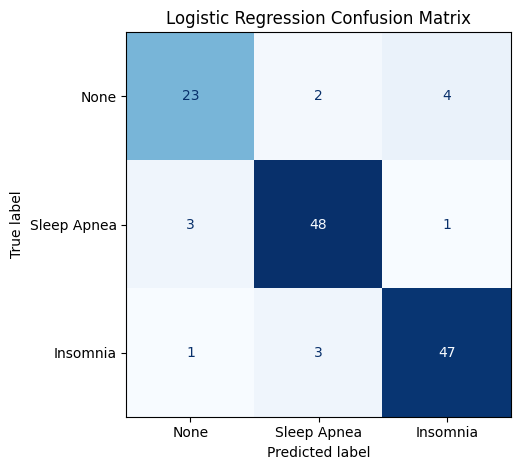

In [25]:
train_and_evaluate_model(LogisticRegression(),'Logistic Regression', X_train, y_train, X_test, y_test)

L2 Regularization Cross-Validation F1_weighted: 0.88 +/- 0.03
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

L2 Regularization Classification Report:
              precision    recall  f1-score   support

        None       0.76      0.76      0.76        29
 Sleep Apnea       0.92      0.92      0.92        52
    Insomnia       0.86      0.86      0.86        51

    accuracy                           0.86       132
   macro avg       0.85      0.85      0.85       132
weighted avg       0.86      0.86      0.86       132



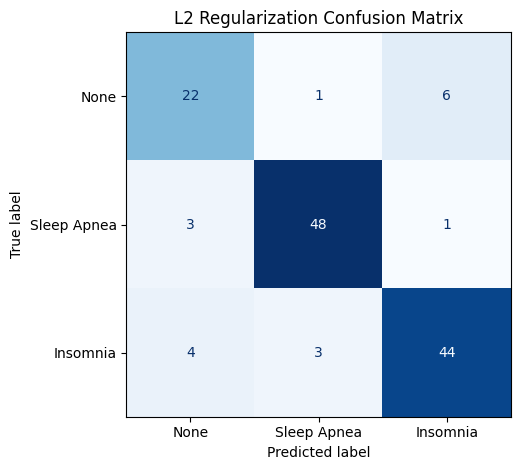

In [26]:
train_and_evaluate_model(RidgeClassifier(),'L2 Regularization', X_train, y_train, X_test, y_test)

KNN Cross-Validation F1_weighted: 0.89 +/- 0.01
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90

KNN Classification Report:
              precision    recall  f1-score   support

        None       0.82      0.79      0.81        29
 Sleep Apnea       0.94      0.92      0.93        52
    Insomnia       0.91      0.94      0.92        51

    accuracy                           0.90       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.90      0.90      0.90       132



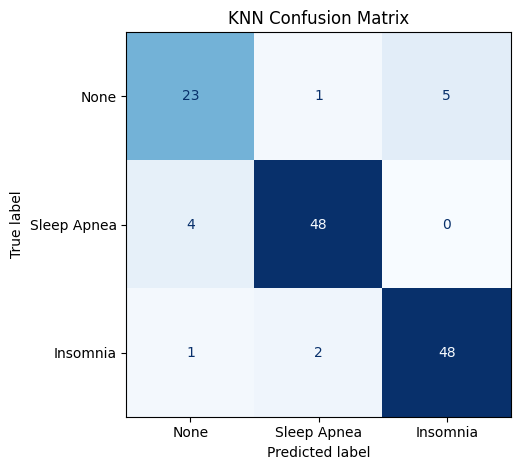

In [27]:
train_and_evaluate_model(KNeighborsClassifier(),'KNN', X_train, y_train, X_test, y_test)

Random Forest Cross-Validation F1_weighted: 0.90 +/- 0.02
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92

Random Forest Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.90      0.84        29
 Sleep Apnea       0.96      0.92      0.94        52
    Insomnia       0.96      0.92      0.94        51

    accuracy                           0.92       132
   macro avg       0.90      0.91      0.91       132
weighted avg       0.92      0.92      0.92       132



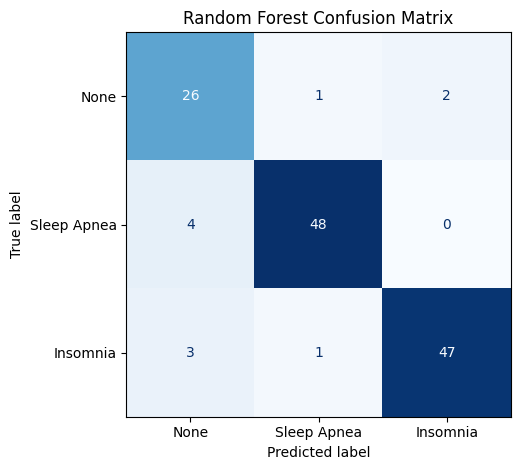

In [37]:
train_and_evaluate_model(RandomForestClassifier(),'Random Forest', X_train, y_train, X_test, y_test)

SVM Cross-Validation F1_weighted: 0.88 +/- 0.03
Accuracy: 0.86
Precision: 0.87
Recall: 0.86
F1 Score: 0.86

SVM Classification Report:
              precision    recall  f1-score   support

        None       0.73      0.83      0.77        29
 Sleep Apnea       0.92      0.92      0.92        52
    Insomnia       0.89      0.82      0.86        51

    accuracy                           0.86       132
   macro avg       0.85      0.86      0.85       132
weighted avg       0.87      0.86      0.86       132



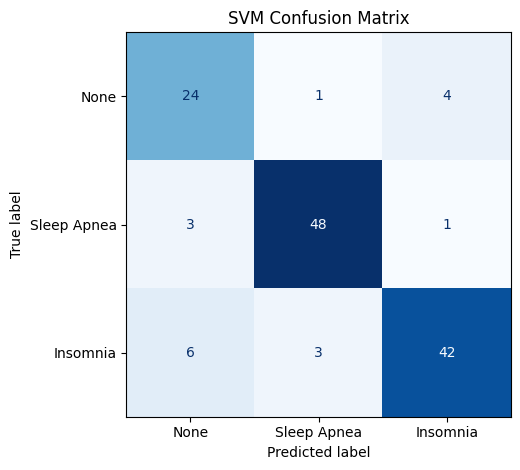

In [29]:
train_and_evaluate_model(SVC(),'SVM', X_train, y_train, X_test, y_test)

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94

XGBoost Classification Report:
              precision    recall  f1-score   support

        None       0.90      0.90      0.90        29
 Sleep Apnea       0.94      0.96      0.95        52
    Insomnia       0.96      0.94      0.95        51

    accuracy                           0.94       132
   macro avg       0.93      0.93      0.93       132
weighted avg       0.94      0.94      0.94       132



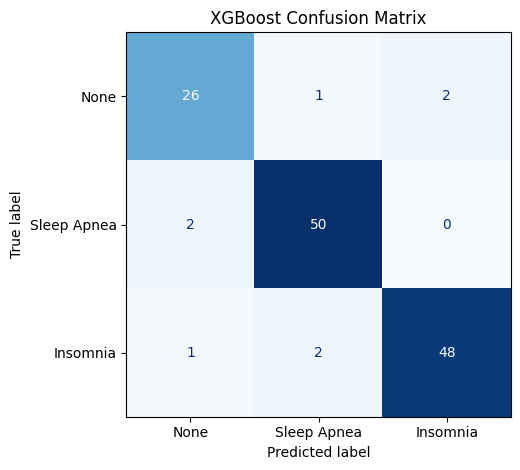

In [30]:
train_and_evaluate_model(XGBClassifier(),'XGBoost', X_train, y_train, X_test, y_test)

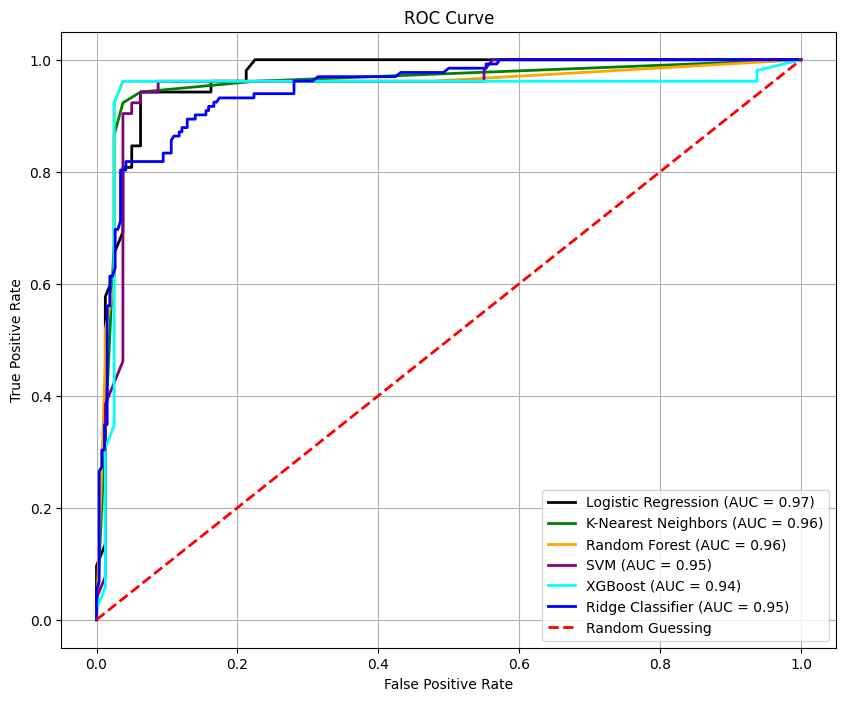

In [31]:
# ROC-AUC Curve for model comparison
fig_roc = plt.figure(figsize=(10, 8))
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'XGBoost']
model_init = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC(probability=True), XGBClassifier()]

for model in model_init:
    model.fit(X_train, y_train)

colors = ['black', 'green', 'orange', 'purple', 'cyan']
for idx, model in enumerate(model_init):
    if model == KNeighborsClassifier():
        y_scores = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1], pos_label=1)
    elif model == RidgeClassifier():
        y_scores = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{models[idx]} (AUC = {roc_auc:.2f})',color=f'{colors[idx]}')

# Ensure y_train and y_test are 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Initialize and fit the RidgeClassifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

y_scores = ridge_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'Ridge Classifier (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()

plt.show()

### 4.3) How did the Models Perform?

**Logistic Regression**
* It was the top-performing model based on cross-validation, achieving an F1 score of **91%**. Additionally, it demonstrated consistent performance with a low standard deviation of **2%**.

**Ridge Classifier**
* The F1-score is slightly lower than Logistic Regression at **88%**, with higher variability in performance, indicated by a **3%** standard deviation, suggesting sensitivity to data variations.

**KNN**
* Although it had a slightly lower F1-score of **89%**, it was the most consistent, with the least standard deviation of **1%**.

**SVM**

* Similar to the Ridge Classifier, it achieved an F1-score of **88%** with a standard deviation of **3%**.

**Random Forest Classifier**

* Compared to Logistic Regression, which achieved an F1-score of **91%** with a standard deviation of **2%**, the Random Forest Classifier (RFC) obtained a slightly lower F1-score of **90%** but demonstrated a similar level of accuracy with a standard deviation of **2%**.

**XGBoost**

* XGBoost achieved an F1-score of 94% on the test set, showing strong performance. The model's overall accuracy, precision, recall, and F1-score are all 94%, indicating well-balanced results across classes.

* For individual classes, **Class 0 (None)** performed slightly lower with metrics around 0.90, suggesting it is less well differentiated from the other classes. **Class 1 (Sleep Apnea)** and **Class 2 (Insomnia)** performed very well, with F1-scores of 0.95 each, indicating good classification of these categories. The macro and weighted averages of 0.93 and 0.94 further confirm the model's robustness, and the 'support' row reveals that Class 1 (Sleep Apnea) has the highest representation in the dataset.

**Confusion Matrix**

The confusion matrix illustrates where our models correctly predicted sleep disorders and where they made errors. XGBoost performed the best, showing the most accurate predictions across the classes.

**ROC - AUC Curve**

The ROC curve evaluates the classification performance of multiple machine learning models, highlighting their ability to distinguish between classes. Among the models tested, Logistic Regression demonstrated the best performance with an AUC of 0.97, showcasing its strong discriminative power. Close behind was K-Nearest Neighbors (KNN) with an AUC of 0.96, reflecting its robustness in this dataset. Random Forest, Support Vector Machine (SVM), and Ridge Classifier achieved an AUC of 0.95, indicating comparable performance and making them reliable alternatives.

XGBoost, while often considered a high-performing model, showed a slightly lower AUC of 0.94, possibly due to dataset characteristics or suboptimal tuning. All models substantially outperformed the random guessing baseline (AUC = 0.5), confirming their efficacy. Logistic Regression's simplicity and effectiveness make it an excellent choice, though the close competition from other models suggests that additional hyperparameter tuning could further enhance results.

## 5) Feature Importance

Text(0.5, 1.0, 'Feature Importance (Random Forest)')

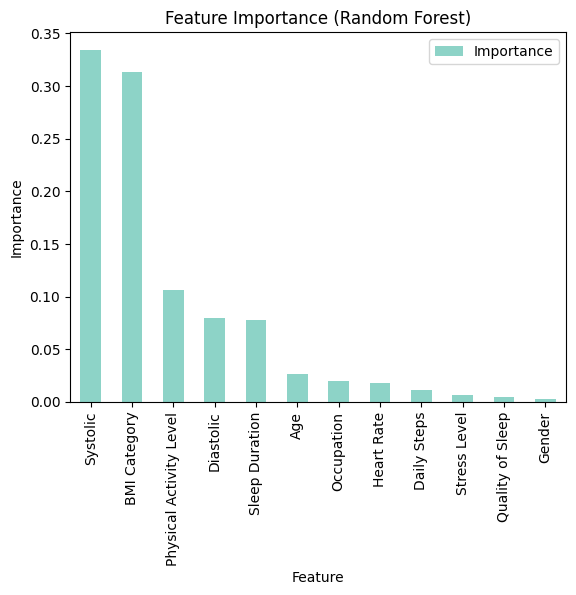

In [38]:
rf = RandomForestClassifier(class_weight='balanced',
                            random_state=42,
                            bootstrap= True,
                            max_depth= None,
                            max_features=None,
                            min_samples_leaf=1,
                            min_samples_split=10,
                            n_estimators= 50
                            ).fit(X_train, y_train)

feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df.sort_values(by='Importance', ascending=False).plot(x='Feature',y='Importance',kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')

The feature importance provided by Random Forest Classifier indicates that the most influential feature in predicting sleep disorder is Systolic (nearly 35% importance), followed by BMI Category (31%), Physical Activity Level (11%) and so on.

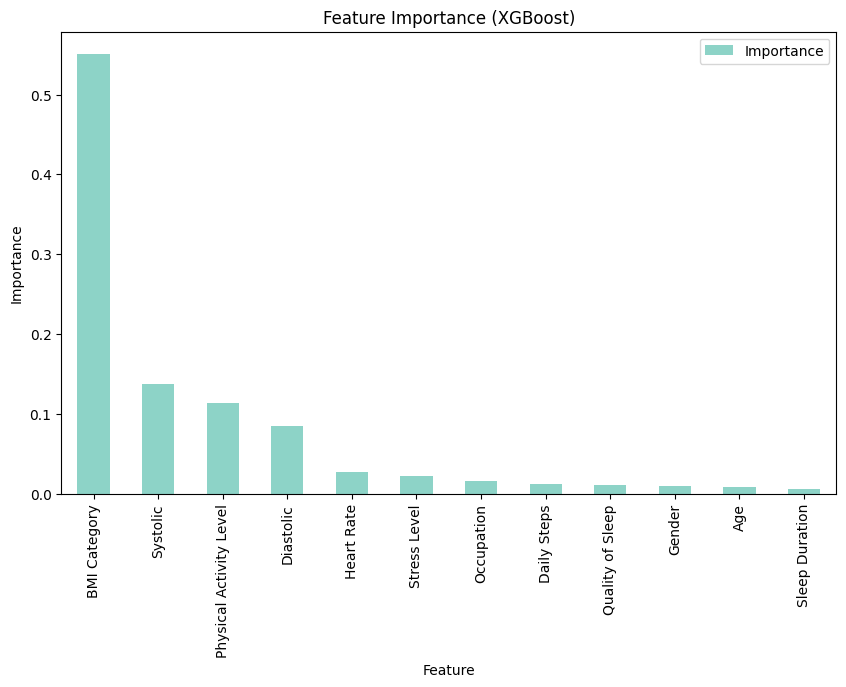

In [ ]:
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1,
    max_depth=None,
    min_child_weight=1,
    n_estimators=50,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0
).fit(X_train, y_train)

# Extract feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort and plot feature importances
features_df.sort_values(by='Importance', ascending=False).plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.ylabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()


## Summary

* The Logistic Regression model achieved the highest F1 score of 91%, with minimal variability (±2%) and an AUC of 0.97, demonstrating its excellent discriminative capability.
* On the test set, XGBoost achieved the highest F1 score of 94%, but it recorded the lowest AUC at 0.94.
* KNN exhibited the least variability at ±1%, while Ridge Regression and SVM showed similar F1 scores of 88% with a variability of ±3%.
* The Random Forest Classifier achieved a solid F1 score of 90%, though its high variability of ±2% suggests room for improvement through hyperparameter tuning.
* The Confusion Matrix indicated that XGBoost was the most effective model.
* The ROC-AUC curve highlights Logistic Regression as the top-performing model, showcasing its exceptional ability to distinguish between classes. With the highest AUC score, it demonstrates superior discriminative power compared to other models.
* Feature importance analysis identified Systolic and BMI category as the two most significant predictors, followed by physical activity level.

## Model Specific Improvements

* To address imbalanced data beyond SMOTE, you can use techniques like Random Oversampling, Undersampling (e.g., NearMiss) and Class Weighting.
* Utilize GridSearchCV to fine-tune model hyperparameters, ensuring optimal performance by systematically exploring combinations of parameter values.

## Recommendations

*  Random Forest is recommended as the primary model for prediction due to its high accuracy, consistent performance, and strong discriminative ability. However, with proper hyperparameter tuning, XGBoost has the potential to achieve even better results, making it a competitive alternative.
* Consider systolic blood pressure and BMI category as critical factors in developing a sleep treatment plan, given their significant influence on predicting sleep disorders.
* Include regular health assessments focusing on systolic blood pressure and BMI category, as these factors play a pivotal role in identifying and addressing sleep disorders effectively.
* Regularly re-evaluate predictive models for sleep disorders using updated data to maintain accuracy and refine treatment plans based on evolving insights.
* Consider expanding the dataset by designing Google Forms or creating a website to collect additional input data, which can then be stored in a structured database for improved modeling.
* Incorporate external datasets, such as regional health statistics or wearable device data, to enrich the model's understanding of sleep patterns and related health conditions.